In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
import random


In [2]:
file  = '/Users/mingzhangyin/Dropbox (UFL)/UF teaching/My course/9-User-generated content, text analysis, sentiment analysis/code/yelp_review_sample.json'
select_reviews = pd.read_json(file)
select_reviews['date'] = pd.to_datetime(select_reviews['date'])

In [3]:
# select 10000 rows from select_reviews
select_reviews = select_reviews.sample(n=10000, random_state=1)
select_reviews.shape

(10000, 9)

In [4]:
select_reviews.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [5]:
select_reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
1530599,NSVNdvys5N3tgmMaBjYNlw,-ZSRFZdWTXYyync7TzYYFg,dqJwAna6gTiPhS-k1F16sA,3,1,1,0,Reuben's is another CBD lunch spot. Located on...,2013-10-11 19:56:09
3243493,JPNPkgNsYY6lJ_lSyTN8VQ,3Qb7Z7dN-_0iZ3yiA_hCOg,3XXt0s_SDC9SyFTiIPNSgA,5,0,0,0,Came here for breakfast at the suggestion of a...,2019-08-19 00:34:25
2580815,3xl7SF3wKFMYy1ANROmq-w,aqbgBGQTeBnIpcbCEEbtCA,V9VLhHdSFpFi4yXFqVcVEA,4,1,1,1,This place is very very good. The wait was fai...,2017-06-16 15:51:52
1928885,2ickpW6Af4VsSrziq0SM_A,rE9qFG0MpOBz00NpufGRzg,uyvOhjyMpDEcBozqBXWgnw,5,0,0,0,"Over the Holidays, we found ourselves in need ...",2019-12-29 17:19:40
1172259,SFKg3SbmfikAV5Fr5o3xwQ,5Z8S9OsHWCnE8wbxk1poQQ,rGShH_JIdcCmxS5njJwiIA,3,0,0,0,I am reviewing the Bob Evans across from the W...,2019-06-27 22:25:06


In [6]:
review_df = select_reviews['text']
txt = list(review_df)
rating = list(select_reviews['stars'])

In [7]:
txt[1]

"Came here for breakfast at the suggestion of a friend. I was tired of breakfast places having lame, plain pancakes that I could just make at home. This is not one of those places. The menu is EXTENSIVE.  So many options! And many pancakes I've never even heard of. We got there at 8:30am and there was no wait even though it seemed pretty busy. The servers were very fast and nice. I got a Dutch Baby so one server came to ask me if I'd ever had one, and since I didn't, told me how to add the lemon and butter and powdered sugar. It was delicious, we were all happy with our food. I prefer to visit new restaurants to try many places, but this is one restaurant I will definitely return to!"

### Preprocess

In [8]:


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer
import re
import string
stop_words = set(stopwords.words('english'))
lemmatizer=WordNetLemmatizer()

In [9]:
i = 1
txt[i] = re.sub(r'\d+', '', txt[i]) # remove numbers
txt[i] = txt[i].lower()     # lower case
txt[i]

"came here for breakfast at the suggestion of a friend. i was tired of breakfast places having lame, plain pancakes that i could just make at home. this is not one of those places. the menu is extensive.  so many options! and many pancakes i've never even heard of. we got there at :am and there was no wait even though it seemed pretty busy. the servers were very fast and nice. i got a dutch baby so one server came to ask me if i'd ever had one, and since i didn't, told me how to add the lemon and butter and powdered sugar. it was delicious, we were all happy with our food. i prefer to visit new restaurants to try many places, but this is one restaurant i will definitely return to!"

In [10]:
txt[i] = txt[i].translate(str.maketrans('', '', string.punctuation)) # remove punctuation
txt[i] = txt[i].strip() # remove white space
txt[i]

'came here for breakfast at the suggestion of a friend i was tired of breakfast places having lame plain pancakes that i could just make at home this is not one of those places the menu is extensive  so many options and many pancakes ive never even heard of we got there at am and there was no wait even though it seemed pretty busy the servers were very fast and nice i got a dutch baby so one server came to ask me if id ever had one and since i didnt told me how to add the lemon and butter and powdered sugar it was delicious we were all happy with our food i prefer to visit new restaurants to try many places but this is one restaurant i will definitely return to'

In [11]:
len(txt[i])

668

In [12]:
tokens = word_tokenize(txt[i]) # tokenize
tokens[:10]

['came',
 'here',
 'for',
 'breakfast',
 'at',
 'the',
 'suggestion',
 'of',
 'a',
 'friend']

In [13]:
len(tokens)

135

In [14]:
remove_stop = [lemmatizer.lemmatize(i) for i in tokens if not i in stop_words] # remove stop words and lemmatize
remove_stop[:10]

['came',
 'breakfast',
 'suggestion',
 'friend',
 'tired',
 'breakfast',
 'place',
 'lame',
 'plain',
 'pancake']

In [15]:
' '.join(remove_stop)

'came breakfast suggestion friend tired breakfast place lame plain pancake could make home one place menu extensive many option many pancake ive never even heard got wait even though seemed pretty busy server fast nice got dutch baby one server came ask id ever one since didnt told add lemon butter powdered sugar delicious happy food prefer visit new restaurant try many place one restaurant definitely return'

"Came here for breakfast at the suggestion of a friend. I was tired of breakfast places having lame, plain pancakes that I could just make at home. This is not one of those places. The menu is EXTENSIVE.  So many options! And many pancakes I've never even heard of. We got there at 8:30am and there was no wait even though it seemed pretty busy. The servers were very fast and nice. I got a Dutch Baby so one server came to ask me if I'd ever had one, and since I didn't, told me how to add the lemon and butter and powdered sugar. It was delicious, we were all happy with our food. I prefer to visit new restaurants to try many places, but this is one restaurant I will definitely return to!"

In [16]:
txt_clean = []
for i in range(len(txt)):    
    txt[i] = re.sub(r'\d+', '', txt[i]) # remove numbers
    txt[i] = txt[i].lower()     # lower case
    txt[i] = txt[i].translate(str.maketrans('', '', string.punctuation)) # remove punctuation
    txt[i] = txt[i].strip() # remove white space
    tokens = word_tokenize(txt[i]) # tokenize
    remove_stop = [lemmatizer.lemmatize(i) for i in tokens if not i in stop_words] # remove stop words and lemmatize
    txt_clean.append(' '.join(remove_stop))


In [17]:
txt_clean[1]

'came breakfast suggestion friend tired breakfast place lame plain pancake could make home one place menu extensive many option many pancake ive never even heard got wait even though seemed pretty busy server fast nice got dutch baby one server came ask id ever one since didnt told add lemon butter powdered sugar delicious happy food prefer visit new restaurant try many place one restaurant definitely return'

In [18]:
txt[1]

'came here for breakfast at the suggestion of a friend i was tired of breakfast places having lame plain pancakes that i could just make at home this is not one of those places the menu is extensive  so many options and many pancakes ive never even heard of we got there at am and there was no wait even though it seemed pretty busy the servers were very fast and nice i got a dutch baby so one server came to ask me if id ever had one and since i didnt told me how to add the lemon and butter and powdered sugar it was delicious we were all happy with our food i prefer to visit new restaurants to try many places but this is one restaurant i will definitely return to'

### Wordcloud

In [19]:
!pip install wordcloud

(-0.5, 399.5, 199.5, -0.5)

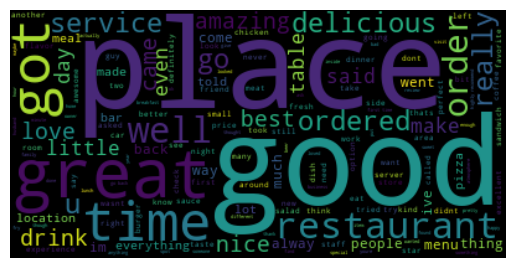

In [20]:
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
stopwords.update(["food", 'one'])
from wordcloud import WordCloud, STOPWORDS
textt = " ".join(review for review in txt_clean)
wordcloud = WordCloud(stopwords=stopwords).generate(text=textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

### Sentiment analysis

In [23]:
#nltk.download('vader_lexicon')
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mingzhangyin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [46]:
len(txt_clean)

10000

In [21]:
txt_clean[1]

'came breakfast suggestion friend tired breakfast place lame plain pancake could make home one place menu extensive many option many pancake ive never even heard got wait even though seemed pretty busy server fast nice got dutch baby one server came ask id ever one since didnt told add lemon butter powdered sugar delicious happy food prefer visit new restaurant try many place one restaurant definitely return'

In [24]:
sia.polarity_scores(txt_clean[1])

{'neg': 0.068, 'neu': 0.702, 'pos': 0.23, 'compound': 0.9274}

In [26]:
score = [sia.polarity_scores(line) for line in txt_clean]
df = pd.DataFrame.from_records(score)
df.head()

,neg,neu,pos,compound
0,0.071,0.654,0.275,0.9922
1,0.068,0.702,0.230,0.9274
2,0.029,0.612,0.359,0.9819
3,0.187,0.712,0.101,-0.3182
4,0.048,0.759,0.193,0.9751


In [27]:
df['text'] = txt
negative = df.iloc[df.neg.nlargest(5).index]
positive = df.iloc[df.pos.nlargest(5).index]
print(f'Most negative:', list(negative.text))
print(f'Most positive:',  list(positive.text))

Most negative: ['horrible experience the store is very dirty and clothes are everywhere the service is very poor they have lost my shirts are two occasion and blamed me i wouldnt recommend this cleaners to one of my enemies', 'just awful awful  shitty tappers bush league staff tourist dump\n\nbeerfest makes me sick\nyou must avoid this hellhole\nor be left to sob', 'bless their hearts hrs wait for food just a damn shame disgusting so sad horrible service no excuse for this whatsoever', 'not the worst but neither the best    good place to get some food prior to seeing a movie', 'do not use these idiots they stole broke and smoked the owner was the biggest idiot to employ these degenerates let him lose his clients']
Most positive: ['the drinks are wonderful and surprisingly strong they are pretty expensive but again very good the atmosphere is beautiful as well they do have a very comfortable and well decorated patio as well', 'seafood fresh and delicious like that you can byob i enjoyed

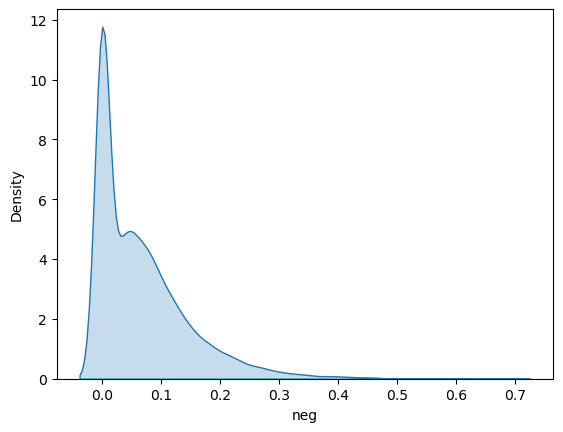

In [21]:
sns.kdeplot(df['neg'], shade=True)
plt.show()

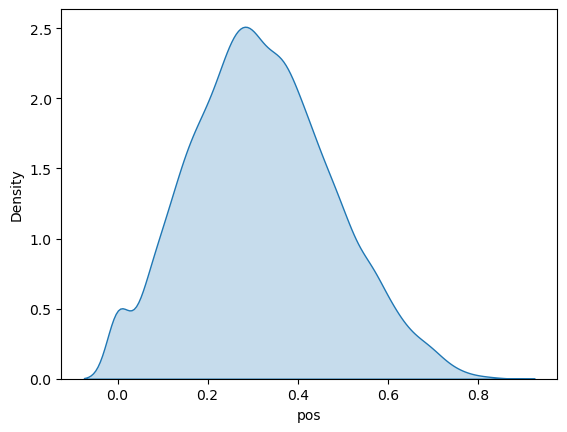

In [22]:
sns.kdeplot(df['pos'], shade=True)
plt.show()

### The sentiment on Sushi-related reviews and pasta-related reviews

In [52]:
idx = ['sushi' in line for line in txt_clean]
txt1 = [txt_clean[i] for i in range(len(txt_clean)) if idx[i]]
score1 = [sia.polarity_scores(line) for line in txt1]
df1 = pd.DataFrame.from_records(score1)

In [53]:
idx = ['pasta' in line for line in txt_clean]
txt2 = [txt_clean[i] for i in range(len(txt_clean)) if idx[i]]
score2 = [sia.polarity_scores(line) for line in txt2]
df2 = pd.DataFrame.from_records(score2)

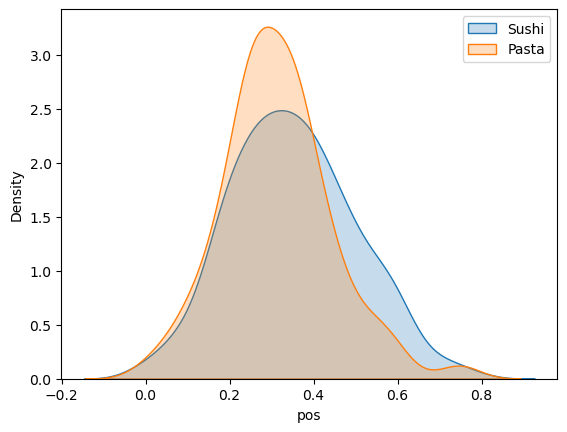

In [54]:
sns.kdeplot(df1['pos'], shade=True)
sns.kdeplot(df2['pos'], shade=True)
plt.legend(['Sushi', 'Pasta'])
plt.show()

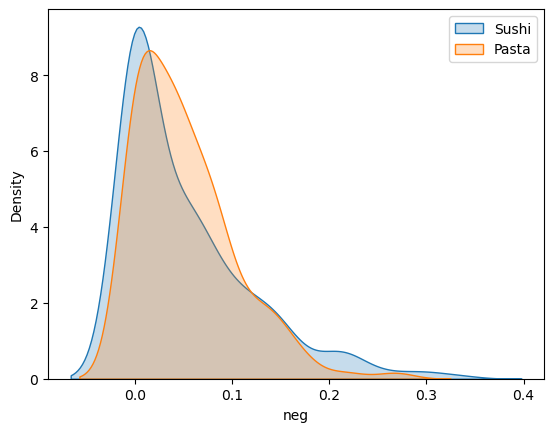

In [26]:
sns.kdeplot(df1['neg'], shade=True)
sns.kdeplot(df2['neg'], shade=True)
plt.legend(['Sushi', 'Pasta'])
plt.show()

### Using the sentiment scores to predict ratings

In [55]:
Y = np.array(rating)
X = df[['neg', 'pos']].values

# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)

print('Coefficients of negative score and positive score on rating: \n', reg.coef_)

# negative score has negative coefficients, which means that the higher the negative score, the lower the rating. 
# positive score has positive coefficients, which means that the higher the positive score, the higher the rating.

Coefficients of negative score and positive score on rating: 
 [-5.31116248  4.12693701]
